Question 1: What is Simple Linear Regression?

Answer:
Simple Linear Regression is a statistical technique used to model the relationship between a dependent variable (Y) and a single independent variable (X) using a straight line.
The model is represented as:

𝑌
=𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β
0
	​

+β
1
	​

X+ϵ

where

𝛽
0
β
0
	​

 = intercept

𝛽
1
β
1
	​

 = slope (effect of X on Y)

𝜖
ϵ = error term


Question 2: Key Assumptions of Simple Linear Regression

Answer:

Linearity: Relationship between X and Y is linear.

Independence: Observations are independent.

Homoscedasticity: Constant variance of residuals.

Normality: Residuals are normally distributed.

No multicollinearity: (Applicable in multiple regression).

Question 3: What is Heteroscedasticity?

Answer:
Heteroscedasticity occurs when the variance of residuals is not constant across all levels of the independent variable(s).
It violates the homoscedasticity assumption and can lead to:

Inefficient estimates of coefficients.

Invalid standard errors, leading to unreliable hypothesis tests.

To address it, we can use transformations (like log(Y)), weighted regression, or robust standard errors.

Question 4: What is Multiple Linear Regression?

Answer:
Multiple Linear Regression models the relationship between one dependent variable and two or more independent variables.

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜖
Y=β
0
	​

+β
1
	​

X
1
	​

+β
2
	​

X
2
	​

+...+β
n
	​

X
n
	​

+ϵ

It helps understand how multiple factors jointly affect the target variable.

Question 5: What is Polynomial Regression?

Answer:
Polynomial Regression extends linear regression by including non-linear terms of the predictor variable.
Example (2nd degree):

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝜖
Y=β
0
	​

+β
1
	​

X+β
2
	​

X
2
+ϵ

It allows fitting curves instead of straight lines but can risk overfitting if degree is too high.

Question 6: Simple Linear Regression in Python

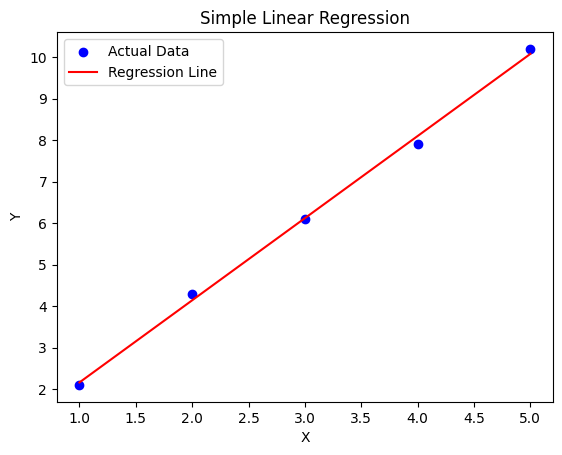

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])


model = LinearRegression()
model.fit(X, Y)


Y_pred = model.predict(X)


plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Question 7: Multiple Linear Regression + VIF

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']


X_const = sm.add_constant(X)


model = sm.OLS(Y, X_const).fit()
print(model.summary())


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print("\nVariance Inflation Factor:")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0377
Time:                        15:16:30   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8: Polynomial Regression (2nd degree)

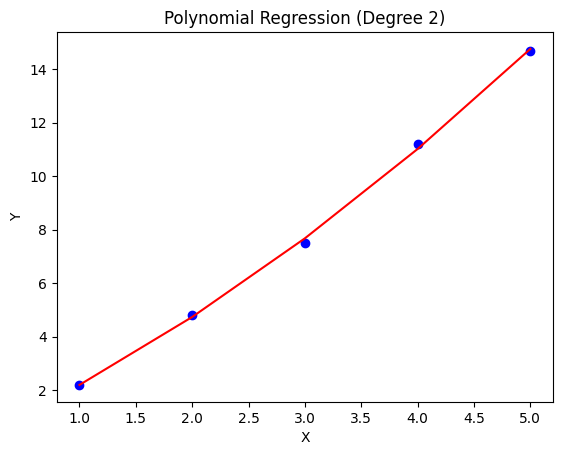

In [3]:
from sklearn.preprocessing import PolynomialFeatures


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


model = LinearRegression()
model.fit(X_poly, Y)


Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Question 9: Residual Plot and Heteroscedasticity

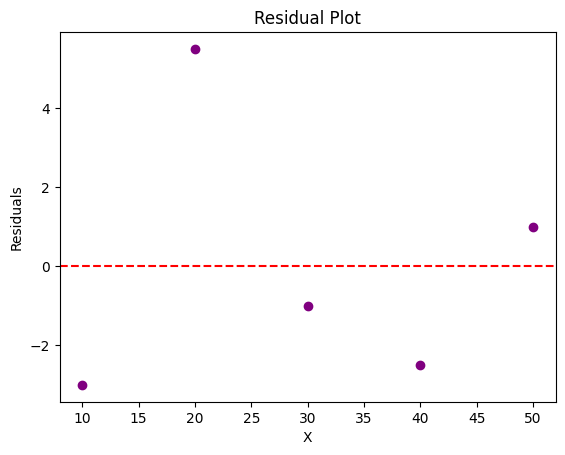

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])


model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)


residuals = Y - Y_pred


plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

print("Residuals:", residuals)


Question 10: Addressing Heteroscedasticity & Multicollinearity

Answer:
As a data scientist predicting house prices, to handle these issues:

 For Heteroscedasticity:

Transform variables (e.g., log(Price)).

Use Weighted Least Squares (WLS) or Robust Standard Errors.

Check residual plots after corrections.

 For Multicollinearity:

Calculate VIF for each predictor (remove variables with VIF > 10).

Remove or combine correlated variables.

Use dimensionality reduction (PCA) or regularization (Ridge/Lasso).

Together, these steps ensure a more robust, interpretable, and reliable regression model.